# Assignment 3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2

E:\DeveloperTools\python\Installation\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
data_path = './Flowers-Dataset/'
batch_size = 32
target_size = (64, 64)

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,
 shear_range=0.2,
 zoom_range=0.2,
 width_shift_range=0.1,
 height_shift_range=0.1,
 horizontal_flip=True,
 validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1. / 255, validation_split=0.2)

In [4]:
X_train = train_datagen.flow_from_directory(data_path,
 target_size=target_size,
 batch_size=batch_size,
 subset="training",
 class_mode='categorical')
X_test = test_datagen.flow_from_directory(data_path,
 target_size=target_size,
 batch_size=batch_size,
 subset="validation",
 class_mode='categorical')

Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


In [5]:
model = Sequential()

In [6]:
model.add(Convolution2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=5, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.fit(X_train, steps_per_epoch=100, epochs=20)

Epoch 1/20
100/100 [==============================] - 51s 495ms/step - loss: 1.3533 - accuracy: 0.4121
Epoch 2/20
100/100 [==============================] - 27s 266ms/step - loss: 1.1763 - accuracy: 0.5062
Epoch 3/20
100/100 [==============================] - 25s 250ms/step - loss: 1.0492 - accuracy: 0.5847
Epoch 4/20
100/100 [==============================] - 24s 236ms/step - loss: 0.9747 - accuracy: 0.6179
Epoch 5/20
100/100 [==============================] - 24s 242ms/step - loss: 0.9452 - accuracy: 0.6314
Epoch 6/20
100/100 [==============================] - 23s 232ms/step - loss: 0.9331 - accuracy: 0.6349
Epoch 7/20
100/100 [==============================] - 24s 241ms/step - loss: 0.8887 - accuracy: 0.6598
Epoch 8/20
100/100 [==============================] - 400s 4s/step - loss: 0.8497 - accuracy: 0.6715
Epoch 9/20
100/100 [==============================] - 23s 232ms/step - loss: 0.8262 - accuracy: 0.6851
Epoch 10/20
100/100 [==============================] - 23s 232ms/step - los

In [10]:
model.save("model.h5")

In [11]:
def predict():
    img = image.load_img("./rose.jpg", target_size=target_size)
    x = image.img_to_array(img)
    x = tf.expand_dims(x,0)
    labels = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
    pred = model.predict(x)
    prediction = labels[np.argmax(pred[0])]
    print(f'The given image is a {prediction}')
    plt.imshow(plt.imread("./rose.jpg"))
    plt.axis('off')
    plt.show()

The given image is a rose


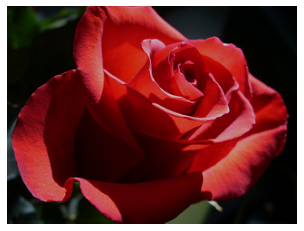

In [12]:
predict()